# Investigate issue #123

## How do you construct a prism in ray-optics?

## Example 1: a right angle prism with a reflecting hypotenuse surface

In [1]:
%matplotlib inline
# use widget to enable interactive figures.
#%matplotlib widget

In [2]:
isdark = False

In [3]:
from rayoptics.environment import *

## Create model from scratch

In [4]:
opm = OpticalModel()
opm.radius_mode = True

sm  = opm['seq_model']
osp = opm['optical_spec']
pm = opm['parax_model']
em = opm['ele_model']
pt = opm['part_tree']
ar = opm['analysis_results']

## Optical Specs: f/5, 500mm efl, 1 deg fov, visual, monochromatic

In [5]:
pupil_diameter = 100.
pupil_radius = pupil_diameter/2
osp.pupil = PupilSpec(osp, key=['object', 'pupil'], value=pupil_diameter)

osp.field_of_view = FieldSpec(osp, key=['object', 'angle'], value=1, 
                              is_relative=True, flds=[0.0, 1.0])

# wavelength for analysis: green, e-line
osp.spectral_region = WvlSpec([('e', 1.0)], ref_wl=0)
listobj(osp)

'pupil' deprecated; use 'epd' instead.
aperture: object epd; value=100.0
field: object angle; value=1.0
x,y=0.0 vlx= 0.000 vux= 0.000 vly= 0.000 vuy= 0.000
y=1.0 vly= 0.000 vuy= 0.000 vlx= 0.000 vux= 0.000
central wavelength=  546.0740 nm
wavelength (weight) =  546.0740 (1.000)*
focus shift=0.0



## Set up initial system - a singlet

In [6]:
sm.do_apertures = False
sm.gaps[0].thi = 1e+11

efl = 500.
opm.add_lens(lbl='L1', power=1/efl, bending=.75, th=12.5, sd=105./2, med='N-BK7,Schott', t=500.)
sm.stop_surface = 1

opm.update_model()

  warnings.warn(msg, RuntimeWarning)



In [7]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+11       air             1      1.0000
 Stop:   294.780971      12.5000     N-BK7             1      52.500
    2: -2063.466800      500.000       air             1      52.500
  Img:     0.000000      0.00000                       1      1.0000


In [8]:
sm.ifcs[-2].optical_power = pm.pwr_slope_solve(pm.ax, -2, -pupil_radius/efl)
opm.update_model(src_model=sm)

sm.gaps[-1].thi += pm.thi_ht_solve(pm.ax, -1, 0.)
opm.update_model(src_model=sm)

In [9]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+11       air             1      1.0000
 Stop:   294.780971      12.5000     N-BK7             1      52.500
    2: -2127.255675      492.758       air             1      52.500
  Img:     0.000000      0.00000                       1      1.0000


In [10]:
pm.first_order_data()

efl                 500
ffl                -499
pp1               1.003
bfl               492.8
ppk               7.242
m                -5e-09
red              -2e+08
obj_dist          1e+11
obj_ang               1
enp_dist             -0
enp_radius           50
na obj            5e-10
n obj                 1
img_dist          492.8
img_ht            8.728
exp_dist         -8.247
exp_radius         50.1
f/# img               5
na img          -0.0995
n img                 1
optical invariant       0.8728



In [11]:
pm.list_model()

           ax_ht        pr_ht       ax_slp       pr_slp         power          tau        index    type
 0:            0 -1.74551e+09        5e-10    0.0174551             0        1e+11      1.00000    dummy
 1:           50            0   -0.0879843    0.0174551   0.001759686       8.2306      1.51872    transmit
 2:      49.2758     0.143666         -0.1      0.01742  0.0002438456      492.758      1.00000    transmit
 3: -7.10543e-15      8.72753         -0.1      0.01742             0            0      1.00000    dummy


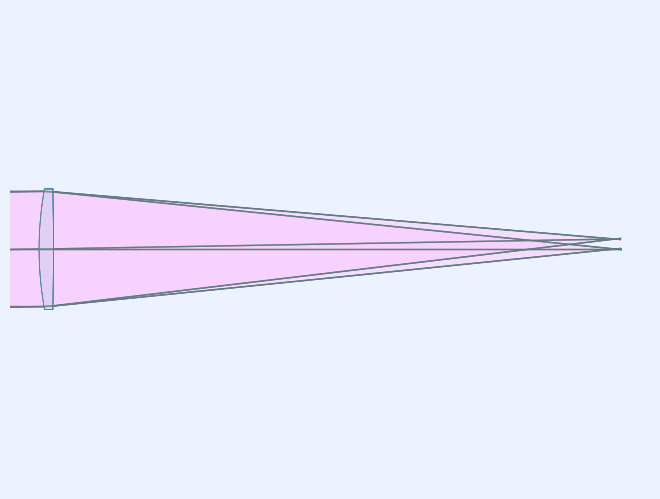

In [12]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()

  warnings.warn(msg, RuntimeWarning)



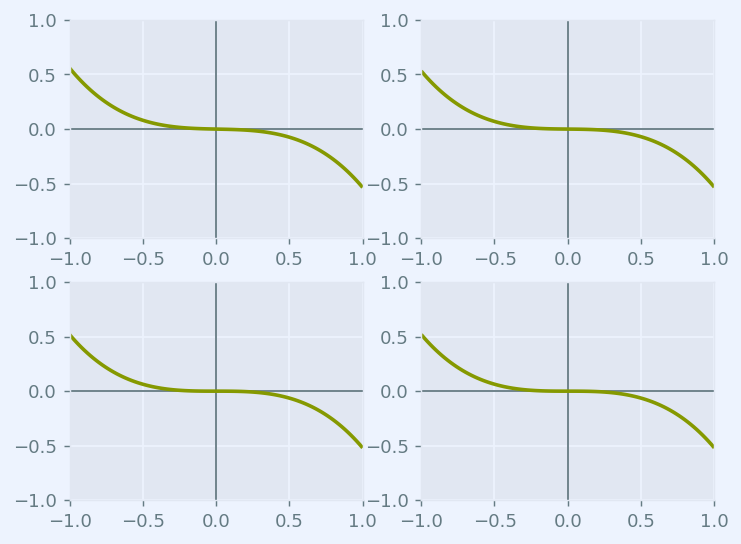

In [13]:
ta_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', 
                     scale_type=Fit.User_Scale, user_scale_value=1., dpi=130, is_dark=isdark).plot()

## add plane-parallel plate

In [14]:
sm.gaps[-1].thi = 300.
opm.add_lens(lbl='L1', power=0.0, th=75, sd=75./2, med='N-BK7,Schott', t=125.)

opm.update_model()

sm.gaps[-1].thi += pm.thi_ht_solve(pm.ax, -1, 0.)
opm.update_model(src_model=sm)

In [15]:
sm.list_model()

              r            t        medium     mode   zdr      sd
  Obj:     0.000000  1.00000e+11       air             1      1.0000
 Stop:   294.780971      12.5000     N-BK7             1      52.500
    2: -2127.255675      300.000       air             1      52.500
    3:     0.000000      75.0000     N-BK7             1      37.500
    4:     0.000000      143.375       air             1      37.500
  Img:     0.000000      0.00000                       1      1.0000


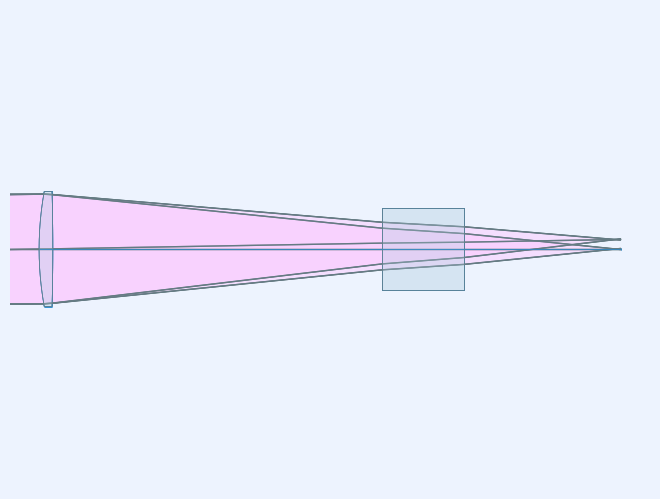

In [16]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()

  warnings.warn(msg, RuntimeWarning)



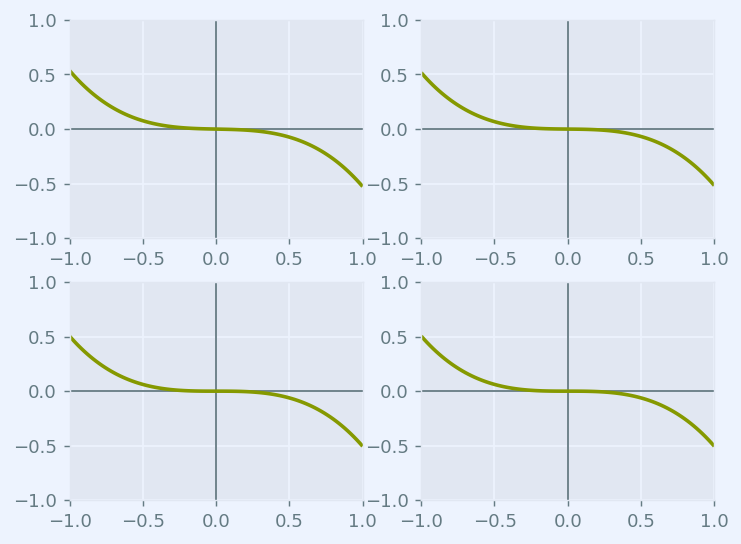

In [17]:
ta_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', 
                     scale_type=Fit.User_Scale, user_scale_value=1., dpi=130, is_dark=isdark).plot()

## insert a reflecting surface as the prism hypotenuse

In [18]:
sm.set_cur_surface(3)
sm.gaps[3].thi = 37.5
sm.add_surface([0, -37.5, 'refl'])
sm.ifcs[sm.cur_surface].decenter = srf.DecenterData('bend', alpha=45.)

opm.update_model()

sm.gaps[-1].thi += pm.thi_ht_solve(pm.ax, -1, 0.)
opm.update_model(src_model=sm)

In [19]:
sm.list_sg()

               r               mode              type          y       alpha
                       t           medium
  Obj:      0.00000                 
                 1.00000e+11          air
 Stop:      294.781                 
                     12.5000        N-BK7
    2:     -2127.26                 
                     300.000          air
    3:      0.00000                 
                     37.5000        N-BK7
    4:      0.00000          reflect               bend     0.0000     45.000
                    -37.5000        N-BK7
    5:     -0.00000                 
                    -143.375          air
  Img:     -0.00000                 


In [20]:
sm.list_gbl_tfrms()

 0:    1.000000    0.000000    0.000000       0.00000
       0.000000    1.000000    0.000000       0.00000
       0.000000    0.000000    1.000000  -100000000000.00000

 1:    1.000000    0.000000    0.000000       0.00000
       0.000000    1.000000    0.000000       0.00000
       0.000000    0.000000    1.000000       0.00000

 2:    1.000000    0.000000    0.000000       0.00000
       0.000000    1.000000    0.000000       0.00000
       0.000000    0.000000    1.000000      12.50000

 3:    1.000000    0.000000    0.000000       0.00000
       0.000000    1.000000    0.000000       0.00000
       0.000000    0.000000    1.000000     312.50000

 4:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.707107    0.707107       0.00000
       0.000000   -0.707107    0.707107     350.00000

 5:    1.000000    0.000000    0.000000       0.00000
       0.000000    0.000000    1.000000     -37.50000
       0.000000   -1.000000    0.000000     350.00000

 6:    1.000000

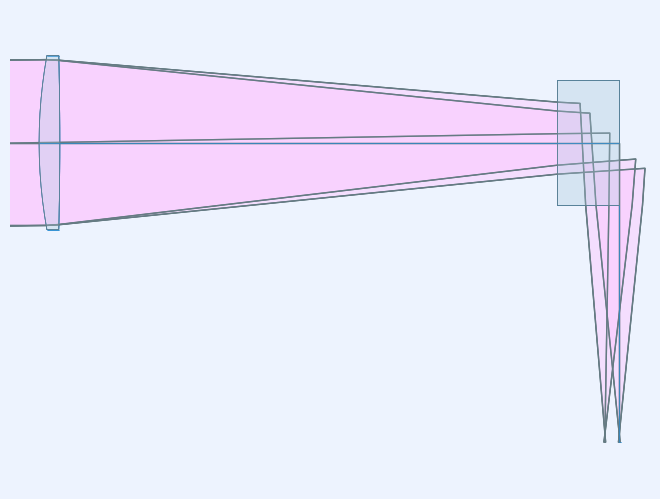

In [21]:
layout_plt = plt.figure(FigureClass=InteractiveLayout, opt_model=opm, is_dark=isdark).plot()

  warnings.warn(msg, RuntimeWarning)



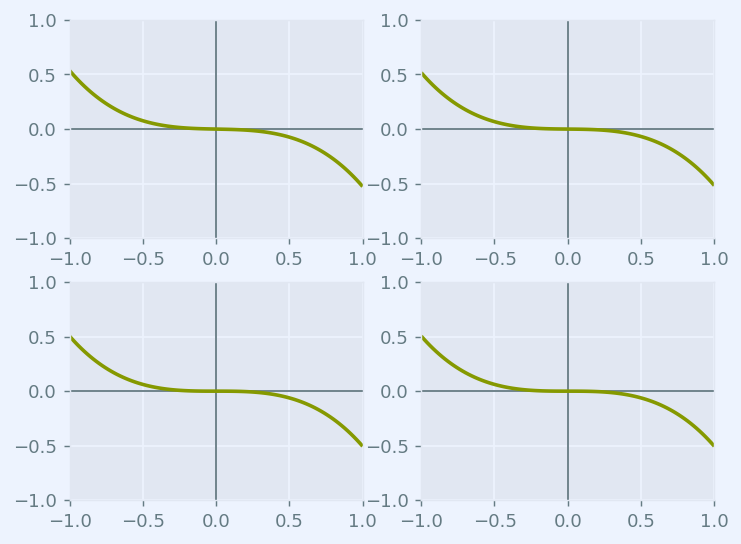

In [22]:
ta_plt = plt.figure(FigureClass=RayFanFigure, opt_model=opm, data_type='Ray', 
                     scale_type=Fit.User_Scale, user_scale_value=1., dpi=130, is_dark=isdark).plot()

## Save a copy of the modified lens

In [23]:
#opm.save_model('new_lens_system/start_system_3_mod')